In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original = r'Original.png'
brain = r'Brain.png'

# 1)

![alt text](Original.png)
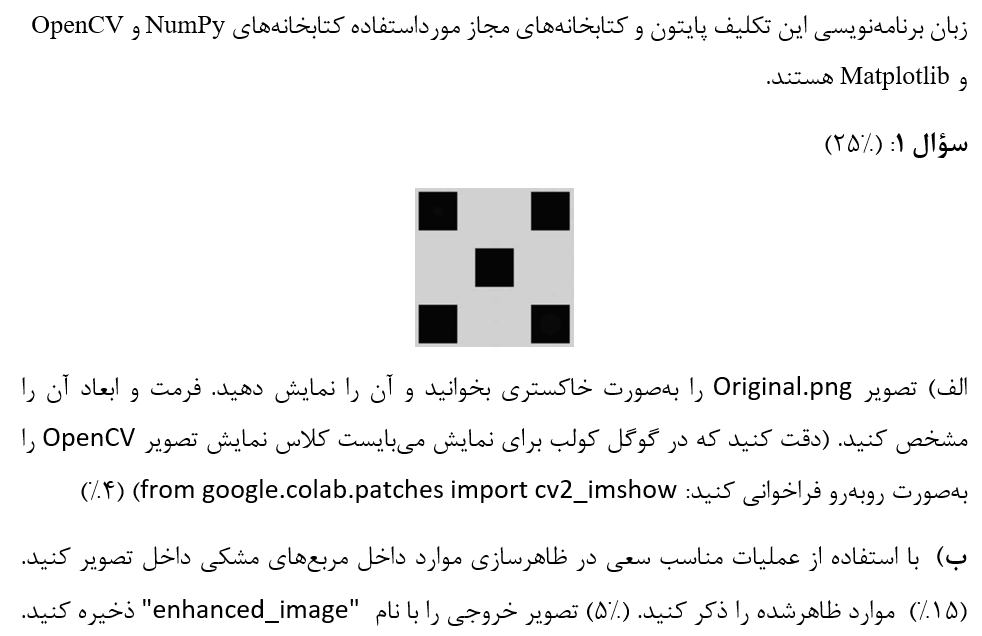

### A 

In [3]:
image = cv2.imread(original, cv2.IMREAD_GRAYSCALE)

height, width = image.shape
print(f"Dimensions: {width} x {height}")
print("Format: Grayscale")

cv2.imshow("Grayscale Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Dimensions: 244 x 244
Format: Grayscale


### B

In [6]:
enhanced_img = np.log1p(np.array(image, dtype=np.float32))  # Log transformation
enhanced_img = np.uint8(enhanced_img / np.max(enhanced_img) * 255)  # Normalize to 0-255

cv2.imshow('Enhanced Image', enhanced_img)
cv2.imwrite('enhanced_image.png', enhanced_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Illustration of the enhanced image and its components**

![alt text](enhanced_image.png)

I first convert the image (which is typically in uint8 format with values from 0 to 255) into a floating-point representation (float32). *This is necessary for performing mathematical operations like logarithms.* The code also adds 1 to the intensity of each pixel to avoid obtaining infinite amount when it encounters a pixel that is purely black. Then the derived intensities are scaled between 0-255.

- The log transformation enhances the contrast in darker regions (black or near-black areas), while reducing the effect of lighter regions. This makes the darker parts of the image more visible and enhances the details in dark or shadowy areas. The opposite can be done if we apply nth power as the lighter parts will dramatically become lighter. If an image is predominantly bright, the differences in the darker regions may be less noticeable. The log transformation compresses the bright regions (high-intensity values) and spreads out the darker regions, *making it easier to distinguish details in low-intensity areas.*

# 2

![image.png](Brain.png)
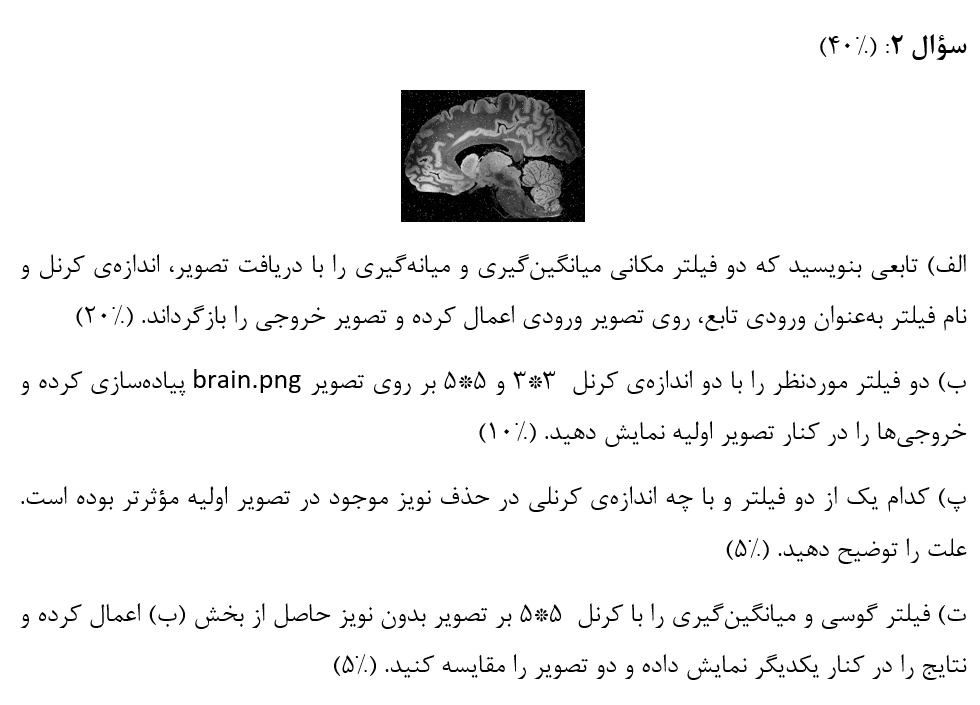

### A

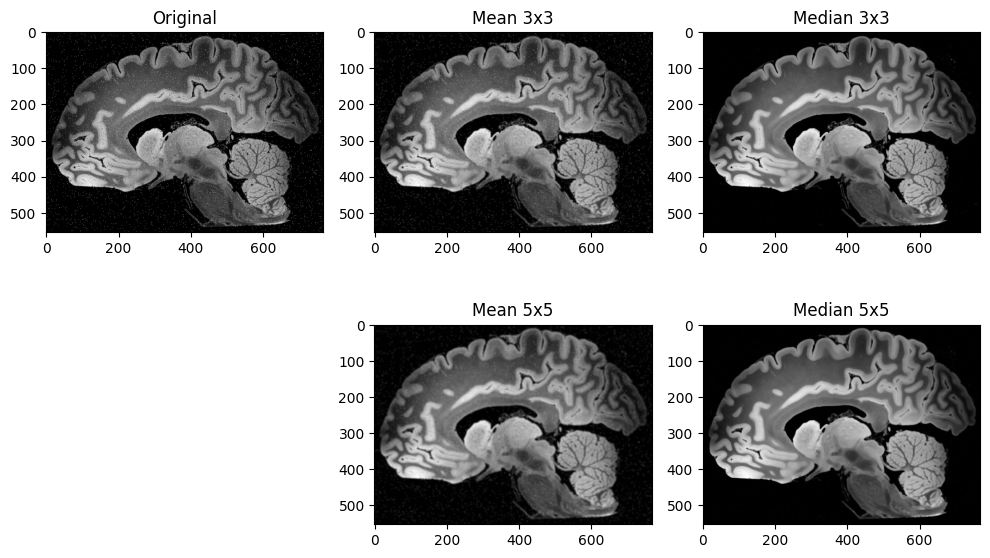

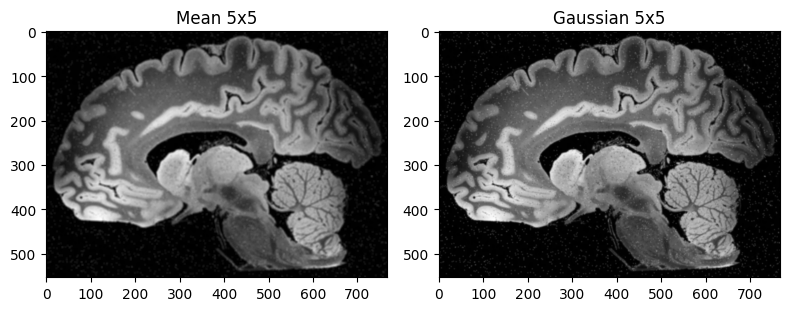

In [5]:
def apply_filters(image, kernel_size):
    mean_filtered = cv2.blur(image, (kernel_size, kernel_size))       # Mean filter
    median_filtered = cv2.medianBlur(image, kernel_size)              # Median filter
    return mean_filtered, median_filtered

# (ب) Read the image in grayscale
img = cv2.imread('brain.png', cv2.IMREAD_GRAYSCALE)

# Apply filters with kernel sizes 3x3 and 5x5
mean3, median3 = apply_filters(img, 3)
mean5, median5 = apply_filters(img, 5)

# Display original and filtered images
plt.figure(figsize=(10,6))
plt.subplot(2,3,1); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(2,3,2); plt.imshow(mean3, cmap='gray'); plt.title('Mean 3x3')
plt.subplot(2,3,3); plt.imshow(median3, cmap='gray'); plt.title('Median 3x3')
plt.subplot(2,3,5); plt.imshow(mean5, cmap='gray'); plt.title('Mean 5x5')
plt.subplot(2,3,6); plt.imshow(median5, cmap='gray'); plt.title('Median 5x5')
plt.tight_layout()
plt.show()

# (ج) Explanation (written part):
# Usually, the median filter works better for removing salt-and-pepper noise,
# because it replaces each pixel with the median of its neighbors instead of the average.
# The 5x5 kernel generally removes more noise but may also blur details.

# (د) Compare Gaussian and mean filters (example of Gaussian 5x5)
gaussian = cv2.GaussianBlur(img, (5,5), 0)
mean, _ = apply_filters(img, 5)

# Display comparison
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(mean, cmap='gray'); plt.title('Mean 5x5')
plt.subplot(1,2,2); plt.imshow(gaussian, cmap='gray'); plt.title('Gaussian 5x5')
plt.tight_layout()
plt.show()


### B

### C

### D